In [1]:
import pandas as pd

In [2]:
deaths_url = "../data/Deaths_Region_2007-2020.csv"

In [3]:
deaths_df = pd.read_csv(deaths_url)

In [4]:
# how many rows and column?
deaths_df.shape


(123480, 7)

In [5]:
# Check out the data types of each column
deaths_df.dtypes

Statistic             object
Year                   int64
Area of Residence     object
Sex                   object
Age at Death          object
UNIT                  object
VALUE                float64
dtype: object

In [6]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123480 entries, 0 to 123479
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Statistic          123480 non-null  object 
 1   Year               123480 non-null  int64  
 2   Area of Residence  123480 non-null  object 
 3   Sex                123480 non-null  object 
 4   Age at Death       123480 non-null  object 
 5   UNIT               123480 non-null  object 
 6   VALUE              71149 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 6.6+ MB


In [7]:
# get some statistics on the numeric columns
deaths_df.describe()

,Year,VALUE
count,123480.000000,71149.000000
mean,2013.500000,79.603311
std,4.031145,651.466019
min,2007.000000,0.000000
25%,2010.000000,1.000000
50%,2013.500000,5.000000
75%,2017.000000,24.000000
max,2020.000000,31765.000000


In [8]:
# get some statistics on non numeric columns
deaths_df.describe(include=object)

,Statistic,Area of Residence,Sex,Age at Death,UNIT
count,123480,123480,123480,123480,123480
unique,1,147,3,20,1
top,Deaths Occurring,Longford town,Female,Under 1 year,Number
freq,123480,840,41160,6174,123480


In [9]:
# look at the data at the beginning of the dataset
deaths_df.head()

,Statistic,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
0,Deaths Occurring,2007,ROI Total,Both sexes,Under 1 year,Number,230.0
1,Deaths Occurring,2007,ROI Total,Both sexes,1 - 4 years,Number,54.0
2,Deaths Occurring,2007,ROI Total,Both sexes,5 - 9 years,Number,17.0
3,Deaths Occurring,2007,ROI Total,Both sexes,10 - 14 years,Number,50.0
4,Deaths Occurring,2007,ROI Total,Both sexes,15 - 19 years,Number,149.0


In [10]:
# look at the data at the end of the dataset
deaths_df.tail()

,Statistic,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
123475,Deaths Occurring,2020,Outside the ROI Total,Female,70 - 74 years,Number,NaN
123476,Deaths Occurring,2020,Outside the ROI Total,Female,75 - 79 years,Number,NaN
123477,Deaths Occurring,2020,Outside the ROI Total,Female,80 - 84 years,Number,NaN
123478,Deaths Occurring,2020,Outside the ROI Total,Female,85 years and over,Number,NaN
123479,Deaths Occurring,2020,Outside the ROI Total,Female,All ages,Number,NaN


# Insights

##### Insight... Age brackets are in groups of 5, lost of fine detail here
##### Insight... There is duplication of  rows if the 'Area of Residence' column is dropped
##### Insight... Last age bracket is 85 and over, lost of fine detail here
##### Insight... The VALUE column is interesting because there are so many missing values!
##### Insight... The values in the VALUE column need to be understood
##### Insight... Comparing outpouts from deaths_df.count() with print(deaths_df.isnull().sum()) is useful
##### Insight... Boxplot does not show much on this dataset at first sight in detecting outliers
##### Insight... First we must convert object types to numeric types in order to Boxplot
##### Insight... Adding a new numeric column that reflects categorical data will allow better Boxplot graphing
##### Insight... sns.pairplot(deaths_df) shows little co-relation between column variables
##### Insight... The trend in the VALUE column data seems to be rising with the years
##### Insight... This dataset is very clean with no apparent corruption and not much missing data
##### Insight... Each year is represented between 2007 - 2020 - i.e. 14 unique values for this column
##### Insight... Two columns have only one value throughout the dataset, i.e.' Statistic' and 'UNIT'
##### Insight... Different strategies may be employed to deal with the missing values in the the 'VALUE' column: for the missing values you may; delete the entire row, replace all with the mean value, replace all with the min value, replace all with the max value. It may be useful to compare each of these strategies one against the other using graphs.
##### Insight... The 'VALUE' column should be compared against the 'Area of Residence' and 'Age at Death' columns.
##### Insight... Dun Laoghaire Rathdown have the highest values in the 'VALUE' column
##### Insight... Ulster, Leinster, Munster and Connacth have values > 3000.0 from the 'VALUE' column
##### Insight... The first 60 rows are ROI totals: 20 each for, Both sexes, Males and Females
##### Insight... The Age_at_Death grouping may be ENCODED in order to change it to a numeric value
##### Insight... Scaling of ??? may inproved graphing i.e. BIG versus SMALL numbers




# Questions

##### Question: What is the 'Unit' column all about?
##### Question: Why is the value 'Number' indicated in the 'Unit' column?
##### Question: Is there metadata or a schema with this dataset? 
##### Question: Is there any values in the 'UNIT' column that is not equal to 'Number'?
##### Question: What is the 'VALUE' column all about?
##### Question: What percentage are claiming state pension and living outside of Ireland?
##### Question: Why are people residing outside of Ireland included in this dataset?
##### Question: Will valuable info be lost by dropping rows with missing data, i.e, VALUE  has 52331  missing values?
##### Question: Will changing the column 'Age at Death' to a numeric value allow better display using Boxplot?
##### Question: Are Ulster, Leinster, Munster and Connaght used as subtotals in the VALUE column?
##### Question: Should Ulster, Leinster, Munster and Connaght 'NOT' be considered when calculating mean().
##### Question: Should the first 60 records (for ROI totals) be removed when calculating mean(), mode()?
##### Question: 

    

In [11]:
# Check column names
deaths_df.columns


Index(['Statistic', 'Year', 'Area of Residence', 'Sex', 'Age at Death', 'UNIT',
       'VALUE'],
      dtype='object')

In [12]:
# replace spaces in column names with underscore characters
deaths_df.columns = [column.replace(" ", "_") for column in deaths_df]

In [13]:
# check columns again for underscores
deaths_df.columns

Index(['Statistic', 'Year', 'Area_of_Residence', 'Sex', 'Age_at_Death', 'UNIT',
       'VALUE'],
      dtype='object')

In [14]:
# Check out the unique values in each column
print("Statistic\t\t: ",deaths_df.Statistic.nunique()) 
print("Year\t\t\t: ", deaths_df.Year.nunique())
print("Sex\t\t\t: ", deaths_df.Sex.nunique())
print("UNIT\t\t\t: ", deaths_df.UNIT.nunique())
print("VALUE\t\t\t: ", deaths_df.VALUE.nunique())
print("Area_of_Residence\t: ", deaths_df.Area_of_Residence.nunique())
print("Age_at_Death\t\t: ", deaths_df.Age_at_Death.nunique())

Statistic		:  1
Year			:  14
Sex			:  3
UNIT			:  1
VALUE			:  1661
Area_of_Residence	:  147
Age_at_Death		:  20


In [15]:
# Select all the men who died
deaths_male_df = deaths_df.loc[deaths_df['Sex']=='Male']

# Select all people who died 65 to 69 years old
deaths_65_69_df = deaths_df.loc[deaths_df['Age_at_Death']=='65 - 69 years']

# All the men who died 65 to 69 years old
deaths_males_65_69_df = deaths_65_69_df.loc[deaths_df['Sex']=='Male']

# Display the result
deaths_males_65_69_df

,Statistic,Year,Area_of_Residence,Sex,Age_at_Death,UNIT,VALUE
34,Deaths Occurring,2007,ROI Total,Male,65 - 69 years,Number,1292.0
94,Deaths Occurring,2007,Dublin City,Male,65 - 69 years,Number,210.0
154,Deaths Occurring,2007,Fingal,Male,65 - 69 years,Number,58.0
214,Deaths Occurring,2007,Balbriggan,Male,65 - 69 years,Number,NaN
274,Deaths Occurring,2007,Rest of Fingal,Male,65 - 69 years,Number,NaN
...,...,...,...,...,...,...,...
123214,Deaths Occurring,2020,Clones Town,Male,65 - 69 years,Number,NaN
123274,Deaths Occurring,2020,Monaghan Town,Male,65 - 69 years,Number,NaN
123334,Deaths Occurring,2020,Ballybay,Male,65 - 69 years,Number,NaN
123394,Deaths Occurring,2020,Rest of Co. Monaghan,Male,65 - 69 years,Number,NaN


In [16]:
# Sort_values() by the VALUE column and study output
deaths_df.sort_values(by=['VALUE'])

,Statistic,Year,Area_of_Residence,Sex,Age_at_Death,UNIT,VALUE
54724,Deaths Occurring,2013,Rest of Co. Laois,Both sexes,15 - 19 years,Number,0.0
60381,Deaths Occurring,2013,Loughrea,Male,1 - 4 years,Number,0.0
60380,Deaths Occurring,2013,Loughrea,Male,Under 1 year,Number,0.0
60373,Deaths Occurring,2013,Loughrea,Both sexes,60 - 64 years,Number,0.0
60370,Deaths Occurring,2013,Loughrea,Both sexes,45 - 49 years,Number,0.0
...,...,...,...,...,...,...,...
123475,Deaths Occurring,2020,Outside the ROI Total,Female,70 - 74 years,Number,NaN
123476,Deaths Occurring,2020,Outside the ROI Total,Female,75 - 79 years,Number,NaN
123477,Deaths Occurring,2020,Outside the ROI Total,Female,80 - 84 years,Number,NaN
123478,Deaths Occurring,2020,Outside the ROI Total,Female,85 years and over,Number,NaN


In [17]:
# Are any rows duplicated
duplicate_rows_df = deaths_df[deaths_df.duplicated()]

duplicate_rows_df

,Statistic,Year,Area_of_Residence,Sex,Age_at_Death,UNIT,VALUE


In [18]:
# Drop Columns we are not interested in.
deaths_df = deaths_df.drop(['Statistic','UNIT'],axis = 1)

# Check to see if the rows are gone
deaths_df

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
0,2007,ROI Total,Both sexes,Under 1 year,230.0
1,2007,ROI Total,Both sexes,1 - 4 years,54.0
2,2007,ROI Total,Both sexes,5 - 9 years,17.0
3,2007,ROI Total,Both sexes,10 - 14 years,50.0
4,2007,ROI Total,Both sexes,15 - 19 years,149.0
...,...,...,...,...,...
123475,2020,Outside the ROI Total,Female,70 - 74 years,NaN
123476,2020,Outside the ROI Total,Female,75 - 79 years,NaN
123477,2020,Outside the ROI Total,Female,80 - 84 years,NaN
123478,2020,Outside the ROI Total,Female,85 years and over,NaN


In [19]:
# count the rows before deleting any data
deaths_df.count()

Year                 123480
Area_of_Residence    123480
Sex                  123480
Age_at_Death         123480
VALUE                 71149
dtype: int64

In [20]:
# Find missing values
print(deaths_df.isnull().sum()) 

# visually compare 
# deaths_df.isnull().sum() --- output 
# deaths_df.count()        --- output
deaths_df.count()

Year                     0
Area_of_Residence        0
Sex                      0
Age_at_Death             0
VALUE                52331
dtype: int64


Year                 123480
Area_of_Residence    123480
Sex                  123480
Age_at_Death         123480
VALUE                 71149
dtype: int64

In [21]:
#deaths_df.query()

In [22]:
# Look for Dublin in dataset by
# Returning all the rows containing the string "Dublin" in the column Area_Of_Res 
dublin_df= deaths_df[deaths_df["Area_of_Residence"].str.contains("Dublin") == True]
dublin_df

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
60,2007,Dublin City,Both sexes,Under 1 year,25.0
61,2007,Dublin City,Both sexes,1 - 4 years,2.0
62,2007,Dublin City,Both sexes,5 - 9 years,1.0
63,2007,Dublin City,Both sexes,10 - 14 years,2.0
64,2007,Dublin City,Both sexes,15 - 19 years,10.0
...,...,...,...,...,...
115075,2020,South Dublin,Female,70 - 74 years,87.0
115076,2020,South Dublin,Female,75 - 79 years,75.0
115077,2020,South Dublin,Female,80 - 84 years,98.0
115078,2020,South Dublin,Female,85 years and over,232.0


In [23]:
deaths_df.head()

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
0,2007,ROI Total,Both sexes,Under 1 year,230.0
1,2007,ROI Total,Both sexes,1 - 4 years,54.0
2,2007,ROI Total,Both sexes,5 - 9 years,17.0
3,2007,ROI Total,Both sexes,10 - 14 years,50.0
4,2007,ROI Total,Both sexes,15 - 19 years,149.0


In [24]:
# examine a single age group
# i.e. "['Age_at_Death'] == 1 - 4 years", using .loc[]

deaths_df.loc[deaths_df['Age_at_Death']== "1 - 4 years"]

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
1,2007,ROI Total,Both sexes,1 - 4 years,54.0
21,2007,ROI Total,Male,1 - 4 years,31.0
41,2007,ROI Total,Female,1 - 4 years,23.0
61,2007,Dublin City,Both sexes,1 - 4 years,2.0
81,2007,Dublin City,Male,1 - 4 years,1.0
...,...,...,...,...,...
123381,2020,Rest of Co. Monaghan,Male,1 - 4 years,NaN
123401,2020,Rest of Co. Monaghan,Female,1 - 4 years,NaN
123421,2020,Outside the ROI Total,Both sexes,1 - 4 years,NaN
123441,2020,Outside the ROI Total,Male,1 - 4 years,NaN


In [25]:
# create a new dataframe to store the 20 different age groups that record Age_at_Death 

# select all the values in the column 'Age_at_Death' and store in a series object
agesAtDeath = deaths_df['Age_at_Death']

# check for duplicates
agesAtDeath.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
123475     True
123476     True
123477     True
123478     True
123479     True
Name: Age_at_Death, Length: 123480, dtype: bool

In [26]:
# remove duplicates
agesAtDeath = agesAtDeath.drop_duplicates()

In [27]:
print(type(agesAtDeath))

<class 'pandas.core.series.Series'>


In [28]:
# then cast that series agesAtDeath into a dataframe called agesAtDeath_df
agesAtDeath_df = pd.DataFrame(agesAtDeath, columns=['Age_Group_Code'])


# printout the <class type> for agesAtDeath_df

print(type(agesAtDeath_df))

<class 'pandas.core.frame.DataFrame'>


In [29]:
    # HOW TO GROUPBY THE AGE GROUPS???
agesAtDeath_df

,Age_Group_Code


In [30]:
# not sure what I'm trying to do here|???
deaths_df.groupby(by=['Age_at_Death'])

In [31]:
# create a new dataframe called cleaned_deaths_df that has no missing values
cleaned_deaths_df= deaths_df.dropna()

#count to check the amount of rows dropped
cleaned_deaths_df.count()

Year                 71149
Area_of_Residence    71149
Sex                  71149
Age_at_Death         71149
VALUE                71149
dtype: int64

In [32]:
cleaned_deaths_df.isnull().sum()

Year                 0
Area_of_Residence    0
Sex                  0
Age_at_Death         0
VALUE                0
dtype: int64

In [33]:
# check the column types
cleaned_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71149 entries, 0 to 123059
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               71149 non-null  int64  
 1   Area_of_Residence  71149 non-null  object 
 2   Sex                71149 non-null  object 
 3   Age_at_Death       71149 non-null  object 
 4   VALUE              71149 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [34]:
# TRYING TO GET A MEAN VALUE FOR THE VALUE COLUMN???


In [35]:
# ATTEMPTING TO FILL IN MISSING VALUES WITH MEAN()
#>>> df['C'] = df['C'].apply(np.int64)

cleaned_values_df=cleaned_deaths_df['VALUE'].dropna()
print('cleaned_values_df : ',cleaned_values_df)
cleaned_values_df.count()
print()
#deaths_filled_mean_VALUE_df['VALUE']=deaths_df['VALUE'].fillna(deaths_df['VALUE'].mean()[0])

cleaned_values_df :  0         230.0
1          54.0
2          17.0
3          50.0
4         149.0
          ...  
123055     18.0
123056     27.0
123057     35.0
123058    106.0
123059    223.0
Name: VALUE, Length: 71149, dtype: float64



In [36]:
# Display ROI totals indicated in the 'Area_of_Residence' column
deaths_df[:60]

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
0,2007,ROI Total,Both sexes,Under 1 year,230.0
1,2007,ROI Total,Both sexes,1 - 4 years,54.0
2,2007,ROI Total,Both sexes,5 - 9 years,17.0
3,2007,ROI Total,Both sexes,10 - 14 years,50.0
4,2007,ROI Total,Both sexes,15 - 19 years,149.0
5,2007,ROI Total,Both sexes,20 - 24 years,202.0
6,2007,ROI Total,Both sexes,25 - 29 years,248.0
7,2007,ROI Total,Both sexes,30 - 34 years,248.0
8,2007,ROI Total,Both sexes,35 - 39 years,295.0
9,2007,ROI Total,Both sexes,40 - 44 years,402.0


In [37]:
#diamonds_df['color']=diamonds_df['color'].fillna(diamonds_df['color'].mode()[0])

In [38]:
cleaned_deaths_df.count()

Year                 71149
Area_of_Residence    71149
Sex                  71149
Age_at_Death         71149
VALUE                71149
dtype: int64

In [39]:
cleaned_deaths_df.count()

Year                 71149
Area_of_Residence    71149
Sex                  71149
Age_at_Death         71149
VALUE                71149
dtype: int64

<AxesSubplot:xlabel='VALUE', ylabel='Area_of_Residence'>

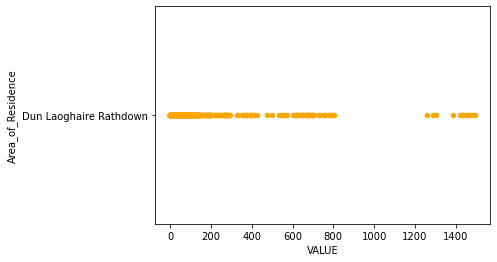

In [40]:
# using loc() find those whose Area of Residence 
# contains Dun Laoghaire 
# and creat a scatter plot against the VALUE column.

deaths_df.loc[deaths_df['Area_of_Residence'].str.contains('Dun Laoghaire')].plot.scatter(y='Area_of_Residence',x='VALUE',c='Orange')

<AxesSubplot:xlabel='VALUE', ylabel='Area_of_Residence'>

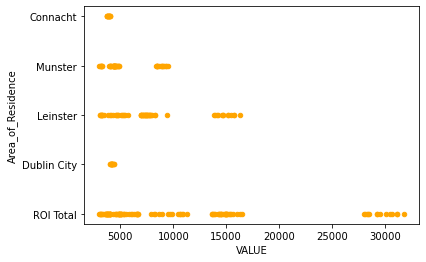

In [41]:
# using loc[] find values in the 'VALUE' column > 3000.0 
# and plot against 'Area_of_Residence' on a scatterplot
deaths_df.loc[deaths_df['VALUE']>3000.0].plot.scatter(y='Area_of_Residence',x='VALUE',c='Orange')




In [42]:
import numpy as np
# create a new column called 'High_Values' to store high values from the 'VALUE' column
deaths_df['High_Values'] = np.where(deaths_df['VALUE'] > 15000, 1, 0)

# select all the high values
deaths_df_high_values=deaths_df.loc[(deaths_df['High_Values']==1)]
deaths_df_high_values

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE,High_Values
19,2007,ROI Total,Both sexes,All ages,28117.0,1
8839,2008,ROI Total,Both sexes,All ages,28274.0,1
17659,2009,ROI Total,Both sexes,All ages,28380.0,1
26479,2010,ROI Total,Both sexes,All ages,27961.0,1
35299,2011,ROI Total,Both sexes,All ages,28456.0,1
44119,2012,ROI Total,Both sexes,All ages,29186.0,1
52939,2013,ROI Total,Both sexes,All ages,29504.0,1
61759,2014,ROI Total,Both sexes,All ages,29252.0,1
70579,2015,ROI Total,Both sexes,All ages,30127.0,1
70599,2015,ROI Total,Male,All ages,15228.0,1


In [43]:
# select all the unique values in the Area_of_Residence column and store in variable area

areas=deaths_df['Area_of_Residence'].unique()
areas
#print(type(areas))

array(['ROI Total', 'Dublin City', 'Fingal', 'Balbriggan',
       'Rest of Fingal', 'Dun Laoghaire Rathdown', 'South Dublin',
       'Leinster', 'Wicklow', 'Arklow Town', 'Bray Town', 'Wicklow Town',
       'Greystones', 'Rest of Wicklow', 'Carlow', 'Carlow Town',
       'Bagenalstown (Muine Bheag)', 'Rest of Co. Carlow', 'Kildare',
       'Athy Town', 'Naas Town', 'Leixlip', 'Newbridge (Droichead Nua)',
       'Rest of Co. Kildare', 'Kilkenny', 'Kilkenny Borough',
       'Rest of Co. Kilkenny', 'Laois', 'Mountmellick', 'Portlaoise',
       'Rest of Co. Laois', 'Longford', 'Longford town', 'Granard',
       'Rest of Co. Longford', 'Louth', 'Drogheda Borough',
       'Dundalk Town', 'Ardee', 'Rest of Co. Louth', 'Meath',
       'Kells Town', 'Navan Town', 'Trim Town', 'Rest of Co. Meath',
       'Offaly', 'Birr Town', 'Tullamore Town', 'Edenderry',
       'Rest of Co. Offaly', 'Westmeath', 'Athlone Town', 'Mullingar',
       'Rest of Co. Westmeath', 'Wexford', 'Enniscorthy Town',
      

In [44]:
# locate all rows in Leinster and store the result in leinster
deaths_leinster_df=deaths_df.loc[deaths_df['Area_of_Residence']=='Leinster']

# get a record count
deaths_leinster_df.count()


Year                 840
Area_of_Residence    840
Sex                  840
Age_at_Death         840
VALUE                839
High_Values          840
dtype: int64

In [45]:
# print out type of leinster
# print('Leinster type : ', type(leinster))

leinster_females_df=deaths_leinster_df.loc[deaths_df['Sex']=='Female']
leinster_females_df.count()


Year                 280
Area_of_Residence    280
Sex                  280
Age_at_Death         280
VALUE                280
High_Values          280
dtype: int64

In [46]:
deaths_df['Area_of_Residence']=='Leinster'

0         False
1         False
2         False
3         False
4         False
          ...  
123475    False
123476    False
123477    False
123478    False
123479    False
Name: Area_of_Residence, Length: 123480, dtype: bool

In [47]:
#  Are there any nulls in the column 'VALUE'
cleaned_deaths_df.VALUE.isnull().sum()

0

In [48]:
deaths_df.columns


Index(['Year', 'Area_of_Residence', 'Sex', 'Age_at_Death', 'VALUE',
       'High_Values'],
      dtype='object')

In [49]:
# select the first 60 rows in the dataset
deaths_df.loc[:59]

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE,High_Values
0,2007,ROI Total,Both sexes,Under 1 year,230.0,0
1,2007,ROI Total,Both sexes,1 - 4 years,54.0,0
2,2007,ROI Total,Both sexes,5 - 9 years,17.0,0
3,2007,ROI Total,Both sexes,10 - 14 years,50.0,0
4,2007,ROI Total,Both sexes,15 - 19 years,149.0,0
5,2007,ROI Total,Both sexes,20 - 24 years,202.0,0
6,2007,ROI Total,Both sexes,25 - 29 years,248.0,0
7,2007,ROI Total,Both sexes,30 - 34 years,248.0,0
8,2007,ROI Total,Both sexes,35 - 39 years,295.0,0
9,2007,ROI Total,Both sexes,40 - 44 years,402.0,0


In [50]:
# create a boolean mask for Area_of_Residence
# NOT WORKING area2 =deaths_df.Area_of_Residence
# NOT WORKING print('area : ',type(area))
#leinster = 
# NOT WORKING area2#.str.contains('Leinster')
#df.drop(df[df['c3'] == False].index, inplace=True)
# NOT WORKING print('leinster : ',type(leinster))
#leinster[:5]

#np.where(leinster, 'Leinster')

In [51]:
#area

In [52]:
# select Area_of_Residence with the value 'Leinster'
leinster=deaths_df.Area_of_Residence.str.find('Leinster')

In [53]:
leinster.head(3)

0   -1
1   -1
2   -1
Name: Area_of_Residence, dtype: int64

In [54]:
# look amoung all the -1's for a different value
leinster.nunique()

2

In [55]:
#STOPPED HERE GOT STUCK

#deaths_df.query(deaths_df[Area_of_Residence]=='Leinster',inplace=False)

##### Attempting to create a new column with values 0 to 19 representing the age groupings
##### matched to the corresponding values in order to plot in a graph
##### This procedure may also work for the "Area of Residence" column.

##### STOPPED HERE
##### 
##### deaths_df['Age_Group_Num']#=deaths_df['Age_at_Death']==ageAtDeath_df
####

##### SEE NOTES 

In [56]:
import seaborn as sns




In [57]:
#sns.boxplot(x=deaths_df["Age_at_Death"])

array([[<AxesSubplot:title={'center':'VALUE'}>]], dtype=object)

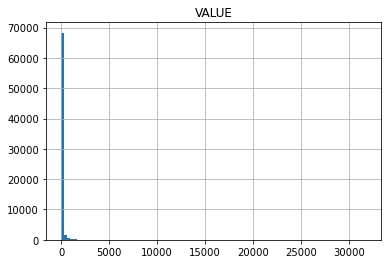

In [58]:
deaths_df.hist(column='VALUE', bins=100)

<AxesSubplot:xlabel='VALUE', ylabel='Count'>

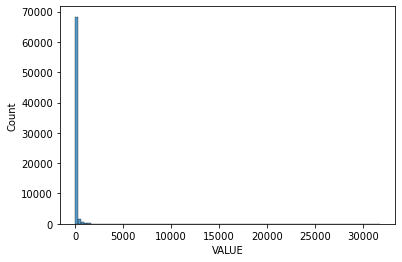

In [59]:
#sns.histplot(diamonds_df.carat, bins=100)

sns.histplot(deaths_df.VALUE, bins=100)

In [60]:
#sns.pairplot(deaths_df)

In [61]:
import matplotlib.pyplot as plt


In [62]:
deaths_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [63]:
# locate rows with a value of 'Both sexes' in the 'Sex' column
both_sexes_df=deaths_df.loc[deaths_df['Sex']=='Both sexes']

# get a count of the result
both_sexes_df.count()


Year                 41160
Area_of_Residence    41160
Sex                  41160
Age_at_Death         41160
VALUE                25315
High_Values          41160
dtype: int64

In [64]:
# get a count of the rows with a missing value
deaths_df.isnull().any(axis = 1).sum()

52331

# STRATEGY  for dealing with the missing values

#### before we get the mean value for the value column 
#### first we remove the first 60 rows that are labeled 'ROI Totals'

#### then decide on what we are going to do with the missing values from the VALUE column
#### There are several possibilities:
#### 1. Just delete all the rows that contain a missing value
#### 2. Replace the missing values with the mean, after taking away the ROI Totals.
#### 3. Replace with the mode and compare using graphs the previous possibilities

In [65]:
# cut out the first 60 rows of 'ROI Total'sle


In [66]:
# create mean variable to store the average value from the VALUE column
deaths_df_VALUE_mean = deaths_df['VALUE'].mean()

# display the mean value of VALUE
print('The mean of the VALUE column is : ',deaths_df_VALUE_mean)

The mean of the VALUE column is :  79.60331136066564


In [67]:
deaths_df['VALUE']=deaths_df['VALUE'].fillna(deaths_df_VALUE_mean)
deaths_df

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE,High_Values
0,2007,ROI Total,Both sexes,Under 1 year,230.000000,0
1,2007,ROI Total,Both sexes,1 - 4 years,54.000000,0
2,2007,ROI Total,Both sexes,5 - 9 years,17.000000,0
3,2007,ROI Total,Both sexes,10 - 14 years,50.000000,0
4,2007,ROI Total,Both sexes,15 - 19 years,149.000000,0
...,...,...,...,...,...,...
123475,2020,Outside the ROI Total,Female,70 - 74 years,79.603311,0
123476,2020,Outside the ROI Total,Female,75 - 79 years,79.603311,0
123477,2020,Outside the ROI Total,Female,80 - 84 years,79.603311,0
123478,2020,Outside the ROI Total,Female,85 years and over,79.603311,0


# GRAPHS

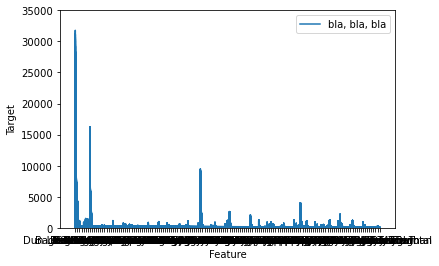

In [68]:
# import the libraries
import mglearn
import matplotlib.pyplot as plt

# naming convention used here is as follows:

# X is the independant variable
# y is the target variable

#X, y = mglearn.datasets.make_wave(n_samples = 100)

# print(X, y)

plt.plot(deaths_df['Area_of_Residence'],deaths_df['VALUE'], label=['label_1','label_2'])#X, y, 'h')
plt.ylim(0, 35000)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["bla, bla, bla", "target","Test "], loc="best")

In [69]:
ageGroups=agesAtDeath_df['Age_at_Death']
print('ageGroups type :', type(ageGroups))
ageGroups

KeyError: 'Age_at_Death'

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
# ENCODE age at death grouping into a number for graphing
data=asarray(agesAtDeath_df[['Age_at_Death']])
             

data

# create a OrdinalEncoder object 
encoder=OrdinalEncoder()

# transform the data and store the return in result
result=encoder.fit_transform(data)

# rename to appropriate variable name
encoded_age_group=result

# check what type object this variable is
print('encoded_age_group : ', type(encoded_age_group) )

# encase in a dataframe object
encoded_age_group_df = pd.DataFrame(encoded_age_group)

# check what type object this variable is now
print('encoded_age_group_df : ', type(encoded_age_group_df) )

#encoded_age_group_df

In [ ]:
# check out this dataframe before joining
agesAtDeath_df.count()


In [ ]:
# check out this dataframe before joining
encoded_age_group_df.count()

In [ ]:
# join the two
ageAtDeathGroupsEncoded = pd.concat([agesAtDeath_df, encoded_age_group_df], axis=1, join='inner')
ageAtDeathGroupsEncoded

In [ ]:
ageAtDeathGroupsEncoded.columns

# References

##### https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/
##### data.columns =[column.replace(" ", "_") for column in data

##### https://stackoverflow.com/users/5299750/christian-steinmeyer
##### https://stackoverflow.com/questions/52173161/getting-a-list-of-indices-where-pandas-boolean-series-is-true
##### >>> timeit s.where(s == True).dropna().index

##### https://stackoverflow.com/questions/30819056/how-to-label-and-change-the-scale-of-seaborn-kdeplots-axes
##### 


##### https://stackoverflow.com/questions/56754831/drop-columns-if-rows-contain-a-specific-value-in-pandas
##### df.loc[:, ~(df == 'Salty').any()]


##### https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/
##### result = pd.concat([df1, df3], axis=1, join='inner')


